## TESTING EFFICIENTNETS WITH FASTAI

Pytorch pretrained EffcientNet models from: https://github.com/lukemelas/EfficientNet-PyTorch
        
Data from https://www.kaggle.com/jutrera/stanford-car-dataset-by-classes-folder

In [1]:
from fastai.vision import *

In [2]:
from efficientnet_pytorch import EfficientNet
from efficientnet_pytorch.utils import Conv2dSamePadding
model = EfficientNet.from_name('efficientnet-b3')

In [3]:
model_name = 'efficientnet-b3'
image_size = EfficientNet.get_image_size(model_name)

In [4]:
image_size

300

In [5]:
model = EfficientNet.from_pretrained(model_name)

Loaded pretrained weights for efficientnet-b3


In [6]:
model

EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False)
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dSamePadding(40, 10, kernel_size=(1, 1), stride=(1, 1))
      (_se_expand): Conv2dSamePadding(10, 40, kernel_size=(1, 1), stride=(1, 1))
      (_project_conv): Conv2dSamePadding(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (_bn2): BatchNorm2d(24, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    )
    (1): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(24, 24, kernel_size=(3, 3), stride=(1, 1), groups=24, bias=False)
      (_bn1): Batc

In [7]:
import pandas as pd

In [8]:
train = pd.read_csv('/media/hdd3tb/data/kaggle_stanford_cars/anno_train.csv', header=None)
test = pd.read_csv('/media/hdd3tb/data/kaggle_stanford_cars/anno_test.csv', header=None)

In [9]:
train.columns = ['file','x1','y1','x2','y2','class']

In [10]:
train.head()

,file,x1,y1,x2,y2,class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [11]:
path = '/media/hdd3tb/data/kaggle_stanford_cars/car_data/'

In [12]:
bs = 8

In [13]:
np.random.seed(42)
src = (ImageList.from_folder(path+'train').split_by_rand_pct(0.1).label_from_folder())

In [14]:
src

LabelLists;

Train: LabelList (7330 items)
x: ImageList
Image (3, 480, 640),Image (3, 480, 640),Image (3, 480, 640),Image (3, 250, 490),Image (3, 390, 800)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 879, 1024),Image (3, 354, 580),Image (3, 375, 500),Image (3, 220, 640),Image (3, 480, 640)
y: CategoryList
Lincoln Town Car Sedan 2011,Aston Martin Virage Coupe 2012,Chevrolet Silverado 1500 Hybrid Crew Cab 2012,Volvo 240 Sedan 1993,GMC Savana Van 2012
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Test: None

In [15]:
src.classes[1]

'Acura Integra Type R 2001'

In [16]:
tfms=get_transforms()

In [17]:
data = (src.transform(tfms, size=448, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

In [18]:
data

ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Lincoln Town Car Sedan 2011,Aston Martin Virage Coupe 2012,Chevrolet Silverado 1500 Hybrid Crew Cab 2012,Volvo 240 Sedan 1993,GMC Savana Van 2012
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Test: None

In [20]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['AM General Hummer SUV 2000',
  'Acura Integra Type R 2001',
  'Acura RL Sedan 2012',
  'Acura TL Sedan 2012',
  'Acura TL Type-S 2008',
  'Acura TSX Sedan 2012',
  'Acura ZDX Hatchback 2012',
  'Aston Martin V8 Vantage Convertible 2012',
  'Aston Martin V8 Vantage Coupe 2012',
  'Aston Martin Virage Convertible 2012',
  'Aston Martin Virage Coupe 2012',
  'Audi 100 Sedan 1994',
  'Audi 100 Wagon 1994',
  'Audi A5 Coupe 2012',
  'Audi R8 Coupe 2012',
  'Audi RS 4 Convertible 2008',
  'Audi S4 Sedan 2007',
  'Audi S4 Sedan 2012',
  'Audi S5 Convertible 2012',
  'Audi S5 Coupe 2012',
  'Audi S6 Sedan 2011',
  'Audi TT Hatchback 2011',
  'Audi TT RS Coupe 2012',
  'Audi TTS Coupe 2012',
  'Audi V8 Sedan 1994',
  'BMW 1 Series Convertible 2012',
  'BMW 1 Series Coupe 2012',
  'BMW 3 Series Sedan 2012',
  'BMW 3 Series Wagon 2012',
  'BMW 6 Series Convertible 2007',
  'BMW ActiveHybrid 5 Sedan 2012',
  'BMW M3 Coupe 2012',
  'BMW M5 Sedan 2010',
  'BMW M6 Convertible 2010',
  'BMW X3 SUV 

In [21]:
list(children(model))[-2:]

[BatchNorm2d(1536, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True),
 Linear(in_features=1536, out_features=1000, bias=True)]

In [22]:
model

EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False)
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dSamePadding(40, 10, kernel_size=(1, 1), stride=(1, 1))
      (_se_expand): Conv2dSamePadding(10, 40, kernel_size=(1, 1), stride=(1, 1))
      (_project_conv): Conv2dSamePadding(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (_bn2): BatchNorm2d(24, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    )
    (1): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(24, 24, kernel_size=(3, 3), stride=(1, 1), groups=24, bias=False)
      (_bn1): Batc

In [23]:
newmodel = model

In [24]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False)
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dSamePadding(40, 10, kernel_size=(1, 1), stride=(1, 1))
      (_se_expand): Conv2dSamePadding(10, 40, kernel_size=(1, 1), stride=(1, 1))
      (_project_conv): Conv2dSamePadding(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (_bn2): BatchNorm2d(24, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    )
    (1): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(24, 24, kernel_size=(3, 3), stride=(1, 1), groups=24, bias=False)
      (_bn1): Batc

In [25]:
newmodel.add_module('_fc',nn.Linear(1536, 196))

In [26]:
newmodel

EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False)
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dSamePadding(40, 10, kernel_size=(1, 1), stride=(1, 1))
      (_se_expand): Conv2dSamePadding(10, 40, kernel_size=(1, 1), stride=(1, 1))
      (_project_conv): Conv2dSamePadding(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (_bn2): BatchNorm2d(24, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    )
    (1): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(24, 24, kernel_size=(3, 3), stride=(1, 1), groups=24, bias=False)
      (_bn1): Batc

In [27]:
loss_func = nn.CrossEntropyLoss()

In [28]:
RMSprop = partial(torch.optim.RMSprop)

In [29]:
import torch
from torch.optim import Optimizer

In [30]:
learn = Learner(data, newmodel, loss_func=loss_func, metrics=[accuracy], opt_func=RMSprop)

In [31]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Lincoln Town Car Sedan 2011,Aston Martin Virage Coupe 2012,Chevrolet Silverado 1500 Hybrid Crew Cab 2012,Volvo 240 Sedan 1993,GMC Savana Van 2012
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
  

In [32]:
learn.model

EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(40, 40, kernel_size=(3, 3), stride=[1, 1], groups=40, bias=False)
      (_bn1): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
      (_se_reduce): Conv2dSamePadding(40, 10, kernel_size=(1, 1), stride=(1, 1))
      (_se_expand): Conv2dSamePadding(10, 40, kernel_size=(1, 1), stride=(1, 1))
      (_project_conv): Conv2dSamePadding(40, 24, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (_bn2): BatchNorm2d(24, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    )
    (1): MBConvBlock(
      (_depthwise_conv): Conv2dSamePadding(24, 24, kernel_size=(3, 3), stride=(1, 1), groups=24, bias=False)
      (_bn1): Batc

In [33]:
learn.split([[learn.model._conv_stem, learn.model._bn0, learn.model._blocks[:12]],
             [learn.model._blocks[12:],learn.model._conv_head], 
             [learn.model._bn1,learn.model._fc]])

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Lincoln Town Car Sedan 2011,Aston Martin Virage Coupe 2012,Chevrolet Silverado 1500 Hybrid Crew Cab 2012,Volvo 240 Sedan 1993,GMC Savana Van 2012
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
  

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 3.31E-06


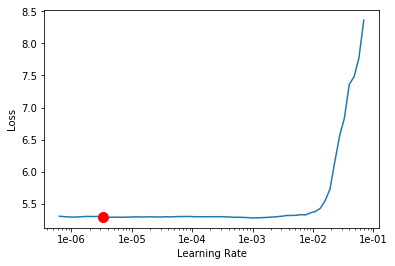

In [34]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [35]:
lr=1e-3

In [36]:
learn.fit_one_cycle(20, max_lr=slice(lr/100,lr))

epoch,train_loss,valid_loss,accuracy,time
0,1.954783,1.454648,0.608108,05:30
1,1.160941,1.180204,0.699017,05:29
2,0.888722,1.395755,0.721130,05:29
3,1.051198,1.174437,0.743243,05:29
4,0.779630,1.173219,0.748157,05:29
5,0.636692,1.363744,0.755528,05:29
6,0.657921,1.047368,0.808354,05:29
7,0.506340,1.030580,0.810811,05:29
8,0.435616,1.437332,0.783784,05:29
9,0.335768,1.293746,0.818182,05:29


In [37]:
learn.save('stage-1-cars-efficientnet-448-b3-git')

In [38]:
learn.load('stage-1-cars-efficientnet-448-b3-git')

Learner(data=ImageDataBunch;

Train: LabelList (7330 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Valid: LabelList (814 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
Lincoln Town Car Sedan 2011,Aston Martin Virage Coupe 2012,Chevrolet Silverado 1500 Hybrid Crew Cab 2012,Volvo 240 Sedan 1993,GMC Savana Van 2012
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/train;

Test: None, model=EfficientNet(
  (_conv_stem): Conv2dSamePadding(3, 40, kernel_size=(3, 3), stride=(2, 2), bias=False)
  (_bn0): BatchNorm2d(40, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
  (_blocks): ModuleList(
    (0): MBConvBlock(
  

## TESTE

In [39]:
np.random.seed(42)
src_test = (ImageList.from_folder(path+'test').split_by_rand_pct(0.0).label_from_folder())

In [40]:
src_test

LabelLists;

Train: LabelList (8041 items)
x: ImageList
Image (3, 768, 1024),Image (3, 480, 640),Image (3, 375, 500),Image (3, 313, 500),Image (3, 350, 490)
y: CategoryList
Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008,Acura TL Type-S 2008
Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/test;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: /media/hdd3tb/data/kaggle_stanford_cars/car_data/test;

Test: None

In [43]:
data_test = (src_test.transform([None, None], size=448, resize_method=ResizeMethod.SQUISH)
        .databunch(bs=bs).normalize(imagenet_stats))

In [44]:
learn.validate(data_test.train_dl)

[0.5842361, tensor(0.9220)]